In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NYHCSurvey.csv")
data['Max_non59']= data.iloc[:,[2,3,4,5,7]].max(axis=1)

In [3]:
data

,Client,Type,6am_9am,9am_noon,Noon_2pm,2pm_5pm,5pm_9pm,9pm_close,Max_non59
0,1,1,18,50,41,76,69,41,76
1,2,1,66,14,86,62,71,46,86
2,3,1,60,43,43,26,91,58,60
3,4,1,59,48,62,15,91,15,62
4,5,1,21,24,59,45,81,131,131
...,...,...,...,...,...,...,...,...,...
995,996,3,9,91,101,70,17,24,101
996,997,3,31,98,85,71,25,12,98
997,998,3,23,33,43,45,30,23,45
998,999,3,16,93,42,59,29,26,93


In [75]:
p0,p59= np.arange(35,126),np.arange(35,126)
final_table = pd.DataFrame({'p0':[], 'p59':[], 'demand_non59':[], 'demand_59':[]})

for index_p0 in p0:
#     print("index_p0",index_p0)
    for index_p59 in p59:
        # Calculate Utility
        utility_non59 = data['Max_non59']-index_p0
        utility_59 = data['5pm_9pm']-index_p59
        
        #Calculate demand
        demand_non59 = (((utility_non59 > utility_59) & (utility_non59 >= 0))*1).sum()        
        demand_59 = (((utility_non59<= utility_59) & (utility_59 >= 0))*1).sum()

        #Append to result table
        final_table=final_table.append({'p0':index_p0, 'p59':index_p59, 
                                        'demand_non59': demand_non59, 'demand_59': demand_59}, ignore_index=True)

In [77]:
final_table

,p0,p59,demand_non59,demand_59
0,35.0,35.0,771.0,227.0
1,35.0,36.0,781.0,217.0
2,35.0,37.0,788.0,210.0
3,35.0,38.0,792.0,206.0
4,35.0,39.0,797.0,201.0
...,...,...,...,...
8276,125.0,121.0,145.0,72.0
8277,125.0,122.0,147.0,66.0
8278,125.0,123.0,147.0,65.0
8279,125.0,124.0,147.0,63.0


## b) What is the correlation coefficient between d59 and p59 when p0 = 50?

In [69]:
print('When p0 = 50, correlation coefficient between d59 and p59 is ',
      final_table[final_table['p0']==50][['demand_59','p59']].corr().iloc[0,1])

When p0 = 50, correlation coefficient between d59 and p59 is  -0.9573817990521418


## c) What is the correlation coefficient between d59 and p0 when p59 = 80?

In [70]:
print('When p59 = 80, correlation coefficient between d59 and p0 is ', 
      final_table[final_table['p59']==80][['demand_59','p0']].corr().iloc[0,1])

When p59 = 80, correlation coefficient between d59 and p0 is  0.9958348747163097


## d) What is the correlation coefficient between d0 and p59 when p0 = 50?

In [71]:
print('When p0 = 50, correlation coefficient between d0 and p59 is ',
      final_table[final_table['p0']==50][['demand_non59','p59']].corr().iloc[0,1])

When p0 = 50, correlation coefficient between d0 and p59 is  0.9550030069620445


## e) What is the correlation coefficient between d0 and p0 when p59 = 80?

In [72]:
print('When p59 = 80, correlation coefficient between d59 and p0 is ',
      final_table[final_table['p59']==80][['demand_non59','p0']].corr().iloc[0,1])

When p59 = 80, correlation coefficient between d59 and p0 is  -0.9919736453405684


## f) Report the results (coefficients, standard errors, p-values, R-2) for the regression of d59 on p59 and p0.

In [10]:
result = sm.ols(formula="demand_59 ~ p0 + p59", data=final_table).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_59   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.475e+04
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:00:32   Log-Likelihood:                -43347.
No. Observations:                8281   AIC:                         8.670e+04
Df Residuals:                    8278   BIC:                         8.672e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    383.6721      2.207    173.878      0.0

## g) Report the results (coefficients, standard errors, p-values, R-2) for the regression of d0 on p59 and p0.

In [11]:
result = sm.ols(formula="demand_non59 ~ p0 + p59", data=final_table).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           demand_non59   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.750e+05
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:00:32   Log-Likelihood:                -43108.
No. Observations:                8281   AIC:                         8.622e+04
Df Residuals:                    8278   BIC:                         8.624e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1146.7269      2.144    534.910      0.0

# Present the full mathematical revenue maximization problem

In [81]:
final_table['revenue_59'] = final_table['demand_59']*final_table['p59']
final_table['revenue_non59']= final_table['demand_non59']*final_table['p0']
final_table['revenue'] = final_table['revenue_59']+final_table['revenue_non59']

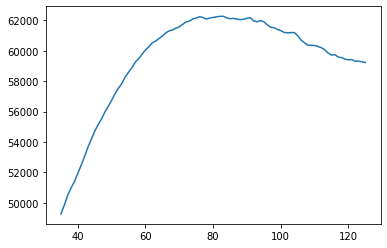

In [87]:
temp_table = final_table[final_table['p0']==65]
plt.plot(temp_table['p59'],temp_table['revenue'])

In [28]:
temp_table.loc[temp_table["revenue"]==temp_table.loc[:,"revenue"].max()]

,p0,p59,demand_non59,demand_59,revenue_59,revenue_non59,revenue
2778,65.0,83.0,801.0,123.0,10209.0,52065.0,62274.0


## Global p0 p59 for Max Revenue

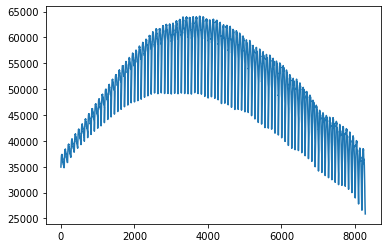

In [15]:
plt.plot(final_table['revenue'])

In [16]:
final_table.loc[final_table["revenue"]==final_table.loc[:,"revenue"].max()]

,p0,p59,demand_non59,demand_59,revenue_59,revenue_non59,revenue
3771,76.0,75.0,636.0,210.0,15750.0,48336.0,64086.0
